In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score,log_loss,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

C:\Users\goutham1996\Anaconda3\envs\tensorflow-sessions\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\goutham1996\Anaconda3\envs\tensorflow-sessions\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv('trainingData.csv')
print("Some Example data");
print(data.tail())
X = data.ix[: ,:520].values
Y = data.ix[: ,522].values
print("Number of training Examples" , X.shape[0])

Some Example data
       WAP001  WAP002  WAP003  WAP004  WAP005  WAP006  WAP007  WAP008  WAP009  \
19932     100     100     100     100     100     100     100     100     100   
19933     100     100     100     100     100     100     100     100     100   
19934     100     100     100     100     100     100     100     100     100   
19935     100     100     100     100     100     100     100     100     100   
19936     100     100     100     100     100     100     100     100     100   

       WAP010     ...      WAP520  LONGITUDE      LATITUDE  FLOOR  BUILDINGID  \
19932     100     ...         100 -7485.4686  4.864875e+06      3           1   
19933     100     ...         100 -7390.6206  4.864836e+06      1           2   
19934     100     ...         100 -7516.8415  4.864889e+06      3           1   
19935     100     ...         100 -7537.3219  4.864896e+06      3           1   
19936     100     ...         100 -7536.1658  4.864898e+06      3           1   

       S

C:\Users\goutham1996\Anaconda3\envs\tensorflow-sessions\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [3]:
Z = np.zeros((X.shape[0],3))
# print(Z.shape) 
# print(X.shape)
k = data.ix[:,523].values
values = to_categorical(k,np.unique(k).shape[0] )
X = np.hstack((X,values))
print("Shape of training set" ,X.shape)

Shape of training set (19937, 523)


In [4]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=33)

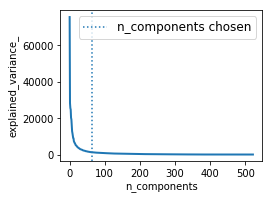

In [5]:
logistic = linear_model.LogisticRegression()

pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])


# Plot the PCA spectrum
pca.fit(X)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

# Prediction
n_components = [20, 40, 64]
Cs = np.logspace(-4, 4, 3)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=Cs))
estimator.fit(X_train, Y_train)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()

In [6]:
print("Best No of Components to Choose " ,estimator.best_estimator_.named_steps['pca'].n_components)

Best No of Components to Choose  64


In [7]:
#PRINCIPAL COMPONENT ANALYSIS
pca = PCA(n_components=estimator.best_estimator_.named_steps['pca'].n_components) 
pca.fit(X)
X1=pca.fit_transform(X)

In [50]:
print("New Shape of Training Examples" , X1.shape)
X_train,X_test,Y_train,Y_test = train_test_split(X1,Y,random_state=33)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

New Shape of Training Examples (19937, 64)
(14952, 64)
(4985, 64)
(14952,)
(4985,)


In [9]:
Y_train.shape

(14952,)

In [10]:
cv_scores = []
# creating odd list of K for KNN
neighbors = list(range(2,20))

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    

The optimal number of neighbors is 3


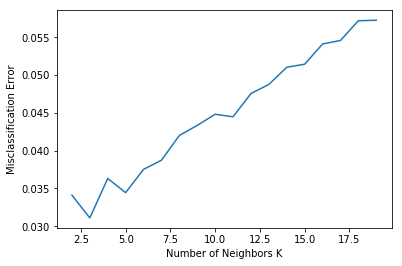

In [11]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [12]:


lr = LogisticRegression(solver='lbfgs' , multi_class='multinomial')
lr.fit(X_train , Y_train)
Y_lr = lr.predict(X_test)
print(accuracy_score(Y_test , Y_lr))


0.8770310932798395


In [14]:


svc= SVC(C=1.0, kernel='rbf')
svc.fit(X_train ,Y_train)
Y_SVC =svc.predict(X_test)
accuracy_score(Y_test,Y_SVC)

0.44754262788365096

In [15]:


rc = RidgeClassifierCV(alphas=(0.1, 1.0, 10.0))
rc.fit(X_train , Y_train)
Y_rc = rc.predict(X_test)
rc.decision_function(X_test)

array([[-1.13942502, -0.58200498,  0.46098355, -0.76057877, -0.97897476],
       [-0.97172093, -1.38248881, -0.28713475,  0.66278698, -1.0214425 ],
       [-0.05527271, -0.39345414, -0.97670744, -0.58308907, -0.99147664],
       ...,
       [-1.18048794, -0.53227456, -0.85661915,  0.45677308, -0.88739143],
       [-1.34886683, -0.78836065, -1.05637833,  0.1606975 ,  0.03290831],
       [-0.58106026, -0.26427212, -0.03193142, -1.16833655, -0.95439965]])

In [16]:


tr = DecisionTreeClassifier(criterion='gini')
tr.fit(X_train , Y_train)
Y_tr = tr.predict(X_test)
accuracy_score(Y_test , Y_tr)

0.8986960882647944

In [17]:


rf = RandomForestClassifier(n_estimators=10,criterion='gini')
rf.fit(X_train , Y_train)
Y_rf = rf.predict(X_test)
accuracy_score(Y_test , Y_rf)

0.9504513540621865

In [18]:

ef = ExtraTreesClassifier(n_estimators=10,criterion='gini')
ef.fit(X_train , Y_train)
Y_ef = ef.predict(X_test)
accuracy_score(Y_test , Y_ef)

0.9534603811434302

In [19]:

gb = GradientBoostingClassifier(loss='deviance')
gb.fit(X_train , Y_train)
Y_gb = gb.predict(X_test)
accuracy_score(Y_test , Y_gb)

0.9275827482447342

In [20]:
model = Sequential()
model.add(Dense(130 , input_dim = X_train.shape[1] ,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(25 , activation = 'relu'))
model.add(Dense(5 , activation = 'softmax'))

In [21]:
#Class labels to categorical

num_classes = np.unique(Y_train).shape[0]
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

In [22]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,Y_train,batch_size=32,epochs = 10)

Epoch 1/10
14952/14952 [==============================] - 5s 358us/step - loss: 5.7609 - acc: 0.5410 0s - loss: 6.1367 - acc:
Epoch 2/10
14952/14952 [==============================] - 3s 210us/step - loss: 1.6816 - acc: 0.7268
Epoch 3/10
14952/14952 [==============================] - 3s 209us/step - loss: 0.6640 - acc: 0.7976
Epoch 4/10
14952/14952 [==============================] - 3s 217us/step - loss: 0.4558 - acc: 0.8450
Epoch 5/10
14952/14952 [==============================] - 3s 225us/step - loss: 0.3562 - acc: 0.8777
Epoch 6/10
14952/14952 [==============================] - 3s 219us/step - loss: 0.3270 - acc: 0.8856
Epoch 7/10
14952/14952 [==============================] - 3s 214us/step - loss: 0.2861 - acc: 0.9037
Epoch 8/10
14952/14952 [==============================] - 3s 213us/step - loss: 0.2613 - acc: 0.9093
Epoch 9/10
14952/14952 [==============================] - 3s 221us/step - loss: 0.2523 - acc: 0.9157
Epoch 10/10
14952/14952 [==============================] - 3s 225u

In [23]:
score = model.evaluate(X_test,Y_test,batch_size=32)

4985/4985 [==============================] - 0s 100us/step


In [24]:
score

[0.16253602705156073, 0.9374122366025192]

In [381]:
#Neural Networks Implementation
import numpy as np
import h5py
import matplotlib.pyplot as plt


%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [382]:
#Activation Functions

def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

def relu(Z):
    """
    Implement the RELU function.
    Arguments:
    Z -- Output of the linear layer, of any shape
    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache


def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.
    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently
    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.
    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently
    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [383]:
#initialize_parameters_deep

def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l - 1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l - 1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

In [384]:
#linear_forward

def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    
    Z = np.dot(W, A) + b
    
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [385]:
#linear_activation_forward

def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
        
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [386]:
#L_model_forward

def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)
    """

    caches = []
    A = X
    L = len(parameters)//2
    
    
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, 
                                             parameters['W' + str(l)], 
                                             parameters['b' + str(l)], 
                                             activation='relu')
        caches.append(cache)
        
        
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, 
                                          parameters['W' + str(L)], 
                                          parameters['b' + str(L)], 
                                          activation='sigmoid')
    caches.append(cache)
    
    
    assert(AL.shape == (1, X.shape[1]))
            
    return AL, caches

In [387]:
#compute_cost

def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[0]

    # Compute loss from aL and y.
    cost = (-1 / m) * np.sum(np.multiply(Y, np.log(AL)) + np.multiply(1 - Y, np.log(1 - AL)))
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

In [388]:
compute_cost(AL ,Y_train)

0.6930592200956334

In [389]:
#linear_backward

def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = np.dot(dZ, cache[0].T) / m
    db = np.squeeze(np.sum(dZ, axis=1, keepdims=True)) / m
    dA_prev = np.dot(cache[1].T, dZ)
    
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    #assert (isinstance(db, float))
    
    return dA_prev, dW, db

In [390]:
#linear_activation_backward

def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        
    
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

In [391]:
# GRADED FUNCTION: L_model_backward

def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    

    current_cache = caches[-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation="sigmoid")
    
    
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 2)], current_cache, activation="relu")
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
      

    return grads

In [392]:
# update_parameters

def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

      
    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        k = grads["db" + str(l + 1)].reshape(parameters["b" + str(l + 1)].shape)
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - (learning_rate * grads["dW" + str(l + 1)])
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - (learning_rate * k)
        #print(parameters["b" + str(l + 1)].shape)
        
    return parameters

In [415]:
#L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate, num_iterations = 3000, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    
    parameters = initialize_parameters_deep(layers_dims)
    
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL, Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate=learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 20 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.693238
Cost after iteration 20: 0.545566
Cost after iteration 40: 0.405774
Cost after iteration 60: 0.273355
Cost after iteration 80: 0.147796
Cost after iteration 100: 0.028585
Cost after iteration 120: -0.084778
Cost after iteration 140: -0.192769
Cost after iteration 160: -0.295840
Cost after iteration 180: -0.394412


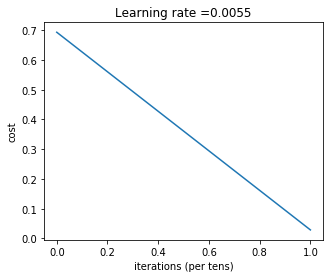

In [420]:
layers_dims = [64, 30, 17, 5, 1]
parameters = L_layer_model(X_train.T,Y_train, layers_dims,learning_rate=0.0055 , num_iterations = 200, print_cost = True)